# Gráfico ilustrativo del Teorema de Lagrange en $\mathbb{R}$

Click [aquí](https://youtu.be/cQNLfTLcqhM) para ver el video subido a YouTube

## Teoría

Teorema de Lagrange en $\mathbb{R}$:

Sea

*   $f$ continua en $[a, b]$
*   $f$ derivable en $(a, b)$

Entonces:

*   $\exists ~ c \in (a,b)$ tal que $f'(c) = \frac{f(b) - f(a)}{b - a}$

El siguiente código encuentra aquellos valores $(c, f(c))$ que cumplen con estas condiciones.

**Función creada a continuación**: `teorema_de_lagrange`

Esta función puede ser llamada de la siguiente manera:

```py
c, f_c = teorema_de_lagrange(x, y)
```
recibe datos en el eje horizontal y vertical, y devuelve una lista ``` [c, f_c] ``` con las coordenadas horizontales y verticales de los puntos $(c, f(c))$ encontrados según el Teorema de Lagrange en $\mathbb{R}$.

En esta función tenemos tres parámetros opcionales: ```h, graficos``` y ```prints```

*   ```h```: valor del $h\approx0$ utilizado para armar cada derivada ($10^{-6}$ por defecto).
*   ```graficos```: Igualar a "True" para que se haga un gráfico que permita visualizar la función, los extremos, la unión entre extremos, las rectas tangentes, y los puntos buscados (True por defecto).
*   ```prints```: Igualar a "True" para que se impriman los valores $(c, f(c))$ (True por defecto).

Los valores de c son:    [-0.9631631631631632, -0.07257257257257255, 1.0321321321321322]
Los valores de f(c) son: [0.9947702918456524, 0.010505817626048696, 0.9957363359831022]


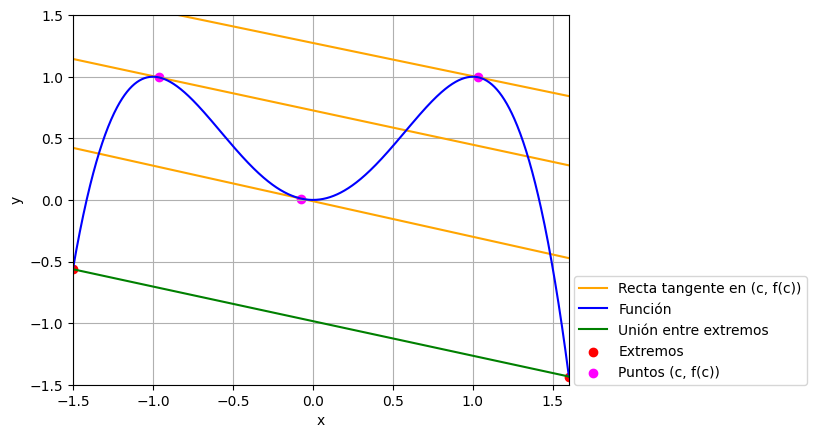

In [1]:
from scipy.interpolate import UnivariateSpline   
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1.5, 1.6, 1000) # Dominio
y = -x**4 + 2*(x**2) # Función f(x). No es necesario que sea una función definida, puede ser una tira de valores

##################################################
def teorema_de_lagrange(x, y, h = 1e-6, graficos = True, prints = True):
    a, b = x[0], x[-1] # a y b
    f_a, f_b = y[0], y[-1] # f(a) y f(b)
    df_c = (f_b - f_a)/(b-a) # Pendiente que une (a, f(a)) con (b, f(b))
    
    ################## Cálculo de la derivada de y, punto por punto: 
    spline_y = UnivariateSpline(x, y, s = 0) # Calcula la interpolación de f(x), donde spline_y(spline_x) son los valores de su eje vertical
    spline_x = np.linspace(a, b, len(x)) # Dominio de la interpolación de f(x)
    
    def derivada(p): # Calcula la derivada del punto p-ésimo de la interpolación por definición (también calcula la derivada en los extremos. Por definición esto no debería ser posible, pero lo es porque realmente el dominio es más grande que spline_x
        limite_derecho = (spline_y(spline_x[p] + h) - spline_y(spline_x[p]) )/(h)
        limite_izquierdo = (spline_y(spline_x[p] + -h) - spline_y(spline_x[p]) )/(-h)
        limite = (limite_derecho + limite_izquierdo)/2
        return limite
    
    derivada_dominio, derivada_imagen = [], []
    for i in range(0, len(spline_x)): # Obtiene dos listas: una con el dominio y otra con la imagen de la derivada en cada punto 
        derivada_imagen.append(derivada(i))
        derivada_dominio.append(spline_x[i])
    
    derivada_dominio, derivada_imagen = np.array(derivada_dominio), np.array(derivada_imagen)
    #plt.plot(derivada_dominio, derivada_imagen, color = 'black', label = 'Derivada de la interpolación') # Dejo esto por si se desea utilizar
    ##################
    
    posiciones_i = []
    for i in range(len(x) - 1): # Para cada posición i-ésima, busca las posiciones que cumplen que f'(c) está entre dos valores sucesivos de la derivada 
        if (derivada_imagen[i] < df_c and derivada_imagen[i+1] >= df_c) or (derivada_imagen[i] > df_c and derivada_imagen[i+1] <= df_c):
            posiciones_i.append(i)
    
    f_c, c, df_c = [], [], [] # No hay problema en redefinir df_c porque el anterior ya no será utilizado
    for j in posiciones_i: # Para cada posición i-ésima encontrada, busca los valores de c, f(c) y f'(c)
        f_c.append(y[j])
        c.append(x[j])
        df_c.append(derivada_imagen[j])
    
    if prints == True:
        print('Los valores de c son:   ', c)
        print('Los valores de f(c) son:', f_c)
    
    ################## Cálculo una recta tangente para cada (c, f(c)) encontrado:
    x_ = np.array([a, b]) # Dominio de las rectas tangente (quiero que sean rectas, por lo tanto me basta con evaluar en los extremos)
    for n in range(len(c)):
        y_ = df_c[n] * (x_ - c[n]) + f_c[n] # Imagen de las rectas tangentes para cada valor de c encontrado
        if graficos == True:  
            if len(c) == 1:
                plt.plot(x_, y_, color = 'orange', label = 'Recta tangente en (c, f(c))')
            else:
                if n == 0:
                    plt.plot(x_, y_, color = 'orange', label = 'Recta tangente en (c, f(c))')
                else:
                    plt.plot(x_, y_, color = 'orange')
    ##################
    if graficos == True:     
        plt.plot(x, y, color = 'blue', label = 'Función')
        plt.plot([a, b], [f_a, f_b], color = 'green', label = 'Unión entre extremos')
        plt.scatter([a, b], [f_a, f_b], color = 'red', label = 'Extremos')
        plt.scatter(c, f_c, color = 'magenta', label = 'Puntos (c, f(c))')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.xlim(x[0], x[-1])
        plt.ylim(-1.5, 1.5)
        plt.legend(loc = (1.01, 0))
        plt.grid()
    return [c, f_c]

#Ejemplo:
c, f_c = teorema_de_lagrange(x, y)

## Animación

Este video muestra a modo de ejemplo la gran cantidad de puntos $(c, f(c))$ que se pueden conseguir según el Teorema de Lagrange. Observar que las rectas tangentes tienen la misma inclinación que la secante (la unión entre los extremos). Para este video se utilizó la función $f(x) = -x^4 + 2x^2$.

In [ ]:
from scipy.interpolate import UnivariateSpline   
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc

rc('animation', html='html5')

x = np.linspace(-1.5, 1.6, 1000) # Dominio
y = -x**4 + 2*(x**2) # Función f(x). No es necesario que sea una función definida, puede ser una tira de valores

##################################################
def teorema_de_lagrange(x, y, h = 1e-6, graficos = True, prints = True):
    a, b = x[0], x[-1] # a y b
    f_a, f_b = y[0], y[-1] # f(a) y f(b)
    df_c = (f_b - f_a)/(b-a) # Pendiente que une (a, f(a)) con (b, f(b))
    
    ################## Cálculo de la derivada de y, punto por punto: 
    spline_y = UnivariateSpline(x, y, s = 0) # Calcula la interpolación de f(x), donde spline_y(spline_x) son los valores de su eje vertical
    spline_x = np.linspace(a, b, len(x)) # Dominio de la interpolación de f(x)
    
    def derivada(p): # Calcula la derivada del punto p-ésimo de la interpolación por definición (también calcula la derivada en los extremos. Por definición esto no debería ser posible, pero lo es porque realmente el dominio es más grande que spline_x
        limite_derecho = (spline_y(spline_x[p] + h) - spline_y(spline_x[p]) )/(h)
        limite_izquierdo = (spline_y(spline_x[p] + -h) - spline_y(spline_x[p]) )/(-h)
        limite = (limite_derecho + limite_izquierdo)/2
        return limite
    
    derivada_dominio, derivada_imagen = [], []
    for i in range(0, len(spline_x)): # Obtiene dos listas: una con el dominio y otra con la imagen de la derivada en cada punto 
        derivada_imagen.append(derivada(i))
        derivada_dominio.append(spline_x[i])
    
    derivada_dominio, derivada_imagen = np.array(derivada_dominio), np.array(derivada_imagen)
    #plt.plot(derivada_dominio, derivada_imagen, color = 'black', label = 'Derivada de la interpolación') # Dejo esto por si se desea utilizar
    ##################
    
    posiciones_i = []
    for i in range(len(x) - 1): # Para cada posición i-ésima, busca las posiciones que cumplen que f'(c) está entre dos valores sucesivos de la derivada 
        if (derivada_imagen[i] < df_c and derivada_imagen[i+1] >= df_c) or (derivada_imagen[i] > df_c and derivada_imagen[i+1] <= df_c):
            posiciones_i.append(i)
    
    f_c, c, df_c = [], [], [] # No hay problema en redefinir df_c porque el anterior ya no será utilizado
    for j in posiciones_i: # Para cada posición i-ésima encontrada, busca los valores de c, f(c) y f'(c)
        f_c.append(y[j])
        c.append(x[j])
        df_c.append(derivada_imagen[j])
    
    if prints == True:
        print('Los valores de c son:   ', c)
        print('Los valores de f(c) son:', f_c)
    
    ################## Cálculo una recta tangente para cada (c, f(c)) encontrado:
    x_ = np.array([a, b]) # Dominio de las rectas tangente (quiero que sean rectas, por lo tanto me basta con evaluar en los extremos)
    for n in range(len(c)):
        y_ = df_c[n] * (x_ - c[n]) + f_c[n] # Imagen de las rectas tangentes para cada valor de c encontrado
        if graficos == True:  
            if len(c) == 1:
                plt.plot(x_, y_, color = 'orange', label = 'Recta tangente en (c, f(c))')
            else:
                if n == 0:
                    plt.plot(x_, y_, color = 'orange', label = 'Recta tangente en (c, f(c))')
                else:
                    plt.plot(x_, y_, color = 'orange')
    ##################
    if graficos == True:     
        plt.plot(x, y, color = 'blue', label = 'Función')
        plt.plot([a, b], [f_a, f_b], color = 'green', label = 'Unión entre extremos')
        plt.scatter([a, b], [f_a, f_b], color = 'red', label = 'Extremos')
        plt.scatter(c, f_c, color = 'magenta', label = 'Puntos (c, f(c))')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.xlim(x[0], x[-1])
        plt.ylim(-1.5, 1.5)
        plt.legend(loc = (1.01, 0))
        plt.grid()
    return [c, f_c]

#Ejemplo:
fig = plt.figure() # Creamos la figura donde se va a hacer la animación
ax = fig.gca() # Hace un par de ejes (gca = obten los ejes actuales de la figura)

def actualizar(i):
    ax.clear() # Borra lo que esté en los ejes, para que no se superpongan los gráficos
    c, f_c = teorema_de_lagrange(x[:i], y[:i], prints=False) # Considero un dominio cada vez más grande a medida que se hacen los gráficos 
    if len(c) == 1: # Pongo un título distinto según la cantidad de puntos encontrados
        plt.title('Puntos (c, f(c)): (' + str(round(c[0], 2)) + ', ' + str(round(f_c[0], 2)) + ')' )
    elif len(c) == 2:
        plt.title('Puntos (c, f(c)): (' + str(round(c[0], 2)) + ', ' + str(round(f_c[0], 2)) + '), (' + str(round(c[1], 2)) + ', ' + str(round(f_c[1], 2)) + ')')
    elif len(c) == 3:
        plt.title('Puntos (c, f(c)): (' + str(round(c[0], 2)) + ', ' + str(round(f_c[0], 2)) + '), (' + str(round(c[1], 2)) + ', ' + str(round(f_c[1], 2)) + '), (' + str(round(c[2], 2)) + ', ' + str(round(f_c[2], 2)) + ')')
    plt.xlim(x[0], x[-1])
    plt.ylim(-1.5, 1.5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

plt.grid()

inter = 19
print(f'Animación a {round(1000/inter, 2)} fotogramas por segundo')
ani = animation.FuncAnimation(fig, actualizar, range(10, len(x)), interval = inter) # (Agarra la figura llamada "fig", itera la función "actualizar", y saca "n" fotos definidas por el range. interval = X hace que cada foto esté sacada cada X milisegundos)
ani